In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [25]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


### simple model for the data

In [26]:
truths_S = [10.5, 1.9, 0.2, 0, 0, 0] # [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

plot_range = [[9.8,11.2], [1.7, 2.3], [0,1.6], [-2,2], [-3,2], [-2,2]]

ndim_short = 3

In [27]:
ms_45 = jsm_mcmc.single_chain("../../../data/model_runs_a23/survey/MinMass/model_4-5/chain.h5",Nstack=300, Nburn=200, Nthin=25, labels=plabels)

ms_50 = jsm_mcmc.single_chain("../../../data/model_runs_a23/survey/MinMass/model_5-0/chain.h5",Nstack=300, Nburn=200, Nthin=25, labels=plabels)

ms_55 = jsm_mcmc.single_chain("../../../data/model_runs_a23/survey/MinMass/model_5-5/chain.h5",Nstack=300, Nburn=200, Nthin=25, labels=plabels)

ms_60 = jsm_mcmc.single_chain("../../../data/model_runs_a23/survey/MinMass/model_6-0/chain.h5",Nstack=300, Nburn=200, Nthin=25, labels=plabels)

ms_65 = jsm_mcmc.single_chain("../../../data/model_runs_a23/survey/Nsample/model_100/chain.h5",Nstack=300, Nburn=200, Nthin=25, labels=plabels)

In [28]:
mlabels = ["logMs=4.5", "logMs=5.0", "logMs=5.5", "logMs=6.0", "logMs=6.5"]

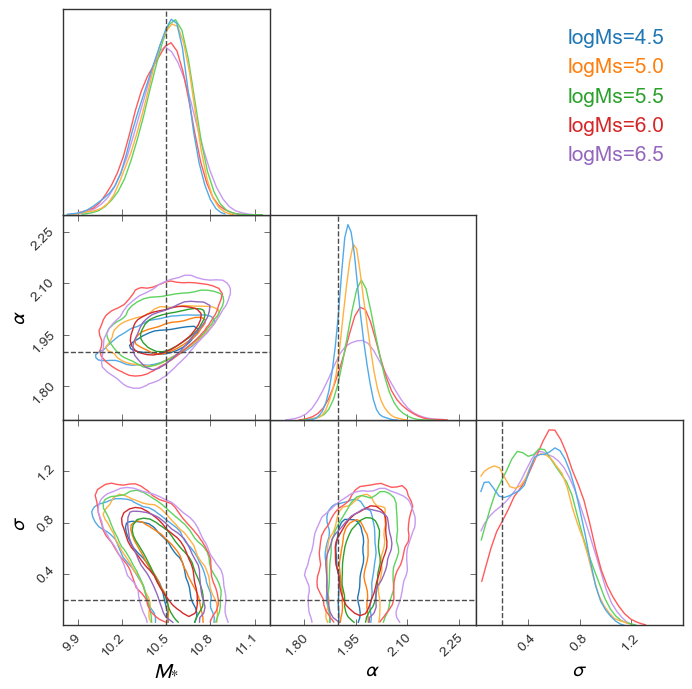

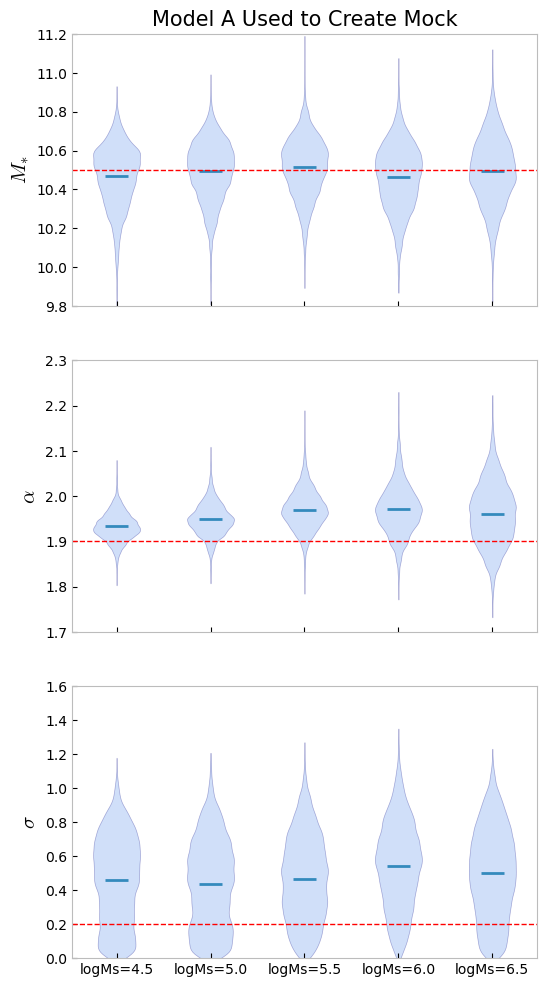

In [30]:
analysis = jsm_mcmc.multi_chain(np.array([ms_45.end, ms_50.end, ms_55.end, ms_60.end, ms_65.end]), ndim_short, truths_S, plot_range, plabels, mlabels, nsigma=2, fill=False, smooth=1, title="Model A Used to Create Mock")

analysis.trim()

analysis.plot_posteriors()

analysis.violin(3)

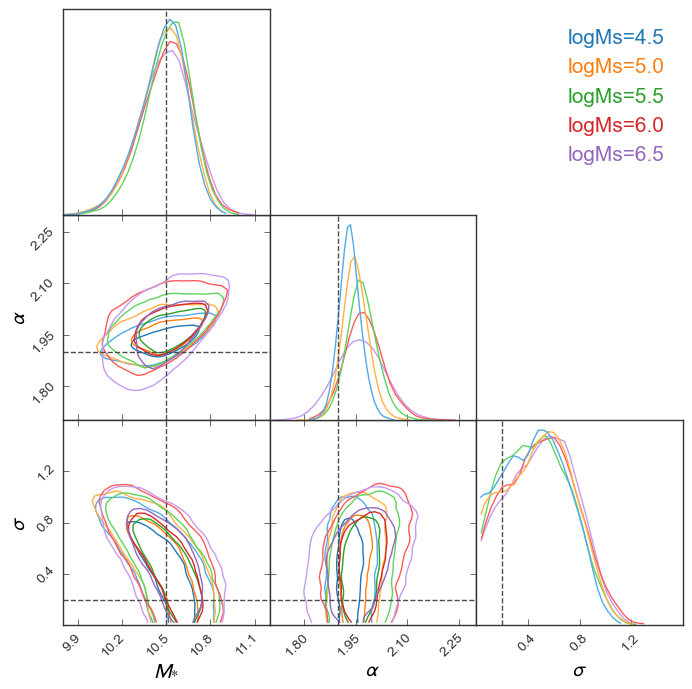

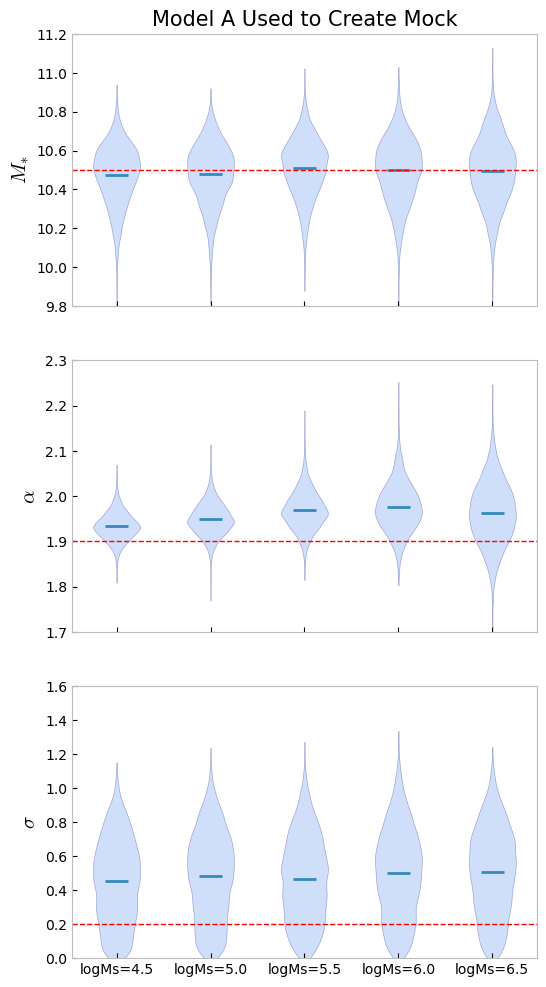

In [31]:
analysis = jsm_mcmc.multi_chain(np.array([ms_45.thin, ms_50.thin, ms_55.thin, ms_60.thin, ms_65.thin]), ndim_short, truths_S, plot_range, plabels, mlabels, nsigma=2, fill=False, smooth=1, title="Model A Used to Create Mock")

analysis.trim()

analysis.plot_posteriors()

analysis.violin(3)